In [1]:
# %%
import ot
import numpy as np
import otmol as otm
import pandas as pd
from openbabel import pybel
import matplotlib.pyplot as plt
import os
from experiment.experiment_utils import experiment
# %matplotlib widget

In [2]:
method = ['fsGW', 'sOT']

In [3]:
data_path = "../Data/FGG-Tripeptide/"
mol_pair_list_path = os.path.join(data_path, 'list')
molecule_pairs = otm.tl.parse_molecule_pairs(mol_pair_list_path, mol_type='FGG')

In [4]:
otmol_name_res = experiment(data_path, molecule_pairs, setup='element name', alpha_list=np.linspace(0,0.5,50), method = method)
otmol_type_res = experiment(data_path, molecule_pairs, setup='atom type', alpha_list=np.linspace(0,0.5,50), method = method)
otmol_conn_res = experiment(data_path, molecule_pairs, setup='atom connectivity', alpha_list=np.linspace(0,0.5,50), method = method)

252_FGG55 253_FGG99 1.77
252_FGG55 254_FGG300 1.93
252_FGG55 255_FGG252 2.01
252_FGG55 256_FGG366 2.23
252_FGG55 257_FGG215 1.48
252_FGG55 258_FGG224 0.75
252_FGG55 259_FGG380 1.28
252_FGG55 260_FGG412 1.72
252_FGG55 261_FGG444 1.14
252_FGG55 262_FGG470 1.31
252_FGG55 263_FGG80 1.49
252_FGG55 264_FGG114 1.64
252_FGG55 265_FGG357 1.59
252_FGG55 266_FGG691 1.97
252_FGG55 253_FGG99 1.88
252_FGG55 254_FGG300 1.98
252_FGG55 255_FGG252 2.09
252_FGG55 256_FGG366 2.33
252_FGG55 257_FGG215 1.48
252_FGG55 258_FGG224 0.75
252_FGG55 259_FGG380 1.33
252_FGG55 260_FGG412 1.71
252_FGG55 261_FGG444 1.14
252_FGG55 262_FGG470 1.31
252_FGG55 263_FGG80 1.51
252_FGG55 264_FGG114 1.69
252_FGG55 265_FGG357 1.64
252_FGG55 266_FGG691 2.08
252_FGG55 253_FGG99 2.04
252_FGG55 254_FGG300 2.31
252_FGG55 255_FGG252 2.40
252_FGG55 256_FGG366 2.56
252_FGG55 257_FGG215 1.61
252_FGG55 258_FGG224 0.96
252_FGG55 259_FGG380 1.54
252_FGG55 260_FGG412 1.94
252_FGG55 261_FGG444 1.31
252_FGG55 262_FGG470 1.48
252_FGG55 263_FGG

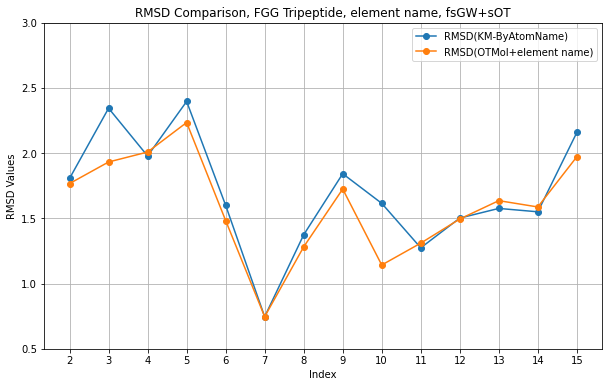

In [5]:
# Concatenate otmol_res and df along the columns
arbalign_res = pd.read_csv(os.path.join(data_path, 'rmsd-2017.dat'), sep='\s+')
combined_df = pd.concat([arbalign_res, otmol_name_res, otmol_type_res, otmol_conn_res], axis=1)
columns_to_plot = ["RMSD(KM-ByAtomName)", "RMSD(OTMol+element name)"]
plt.figure(figsize=(10,6))
for column in columns_to_plot:
    plt.plot(range(2,16), combined_df[column], marker='o', label=column)
plt.title("RMSD Comparison, FGG Tripeptide, element name, fsGW+sOT")
plt.xlabel("Index")
plt.ylabel("RMSD Values")
plt.ylim(0.5, 3)
plt.xticks(range(2,16))
plt.legend()
plt.grid(True)

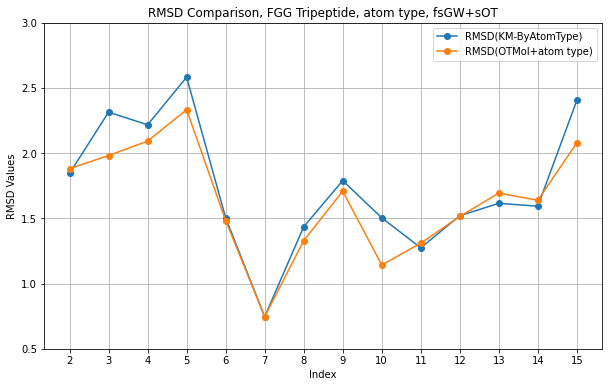

In [6]:
columns_to_plot = ["RMSD(KM-ByAtomType)", "RMSD(OTMol+atom type)"]
plt.figure(figsize=(10,6))
for column in columns_to_plot:
    plt.plot(range(2,16), combined_df[column], marker='o', label=column)
plt.title("RMSD Comparison, FGG Tripeptide, atom type, fsGW+sOT")
plt.xlabel("Index")
plt.ylabel("RMSD Values")
plt.ylim(0.5, 3)
plt.xticks(range(2,16))
plt.legend()
plt.grid(True)

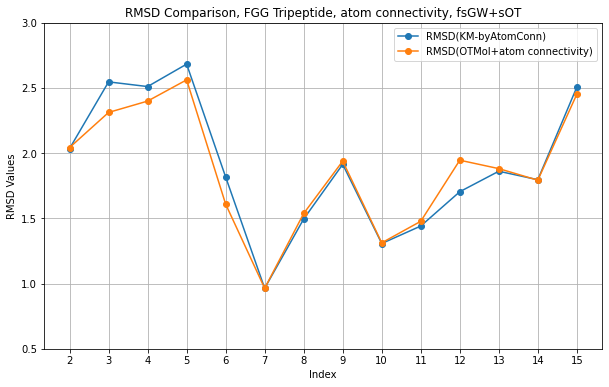

In [7]:
columns_to_plot = ["RMSD(KM-byAtomConn)", "RMSD(OTMol+atom connectivity)"]
plt.figure(figsize=(10,6))
for column in columns_to_plot:
    plt.plot(range(2,16), combined_df[column], marker='o', label=column)
plt.title("RMSD Comparison, FGG Tripeptide, atom connectivity, fsGW+sOT")
plt.xlabel("Index")
plt.ylabel("RMSD Values")
plt.ylim(0.5, 3)
plt.xticks(range(2,16))
plt.legend()
plt.grid(True)

In [8]:
molA = next(pybel.readfile("xyz", "../Data/FGG-Tripeptide/252_FGG55.xyz"))
molB = next(pybel.readfile("xyz", "../Data/FGG-Tripeptide/258_FGG224.xyz"))
X_A, T_A, B_A = otm.tl.process_molecule(molA) 
X_B, T_B, B_B = otm.tl.process_molecule(molB)
assignment = otmol_name_res['assignment'][5]
P = otm.tl.permutation_to_matrix(assignment)
X_B_aligned, _, _ = otm.tl.kabsch(X_A, X_B, P) 
print(otm.tl.root_mean_square_deviation(X_A, X_B_aligned[assignment]))
otm.pl.interactive_alignment_plot(X_A, X_B_aligned, T_A, T_B, B_A, B_B, assignment = assignment, nameA = 'FGG55', nameB = 'FGG224', save = False)

0.7462840440918397
